In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/2023_crash_data.csv')
df.head()

,Unnamed: 0,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,CityDamageFlag,ShortFormFlag,...,PedestrianDirectionTo,DirectionFromIntersection,Comment,SpeedingFlag,HitAndRunFlag,IntersectionNumber,AStreetName,BStreetName,Latitude,Longitude
0,0,711791,CR-0000100908,2,0,0,0,23-306-0529,False,False,...,Not Applicable,East Of,NaN,True,False,110241,SPRUANCE ST,WHITETHORNE DR,37.300611,-121.936797
1,1,692417,CR-0000097700,1,0,0,0,23-081-0828,False,False,...,Not Applicable,South Of,NaN,True,False,22770,BOYNTON AV,CAPE COD CT,37.302711,-121.966043
2,5,690758,CR-0000096895,0,0,0,0,23-015-0781,False,False,...,Not Applicable,At,NaN,False,False,22846,BOYNTON AV,RHODA DR,37.304815,-121.966041
3,6,711585,CR-0000101205,0,0,0,0,23-333-0469,False,False,...,Not Applicable,At,PED(WHEEL CHAIR),False,False,22846,BOYNTON AV,RHODA DR,37.304815,-121.966041
4,8,691267,CR-0000097512,0,0,0,0,23-058-9704,False,True,...,Not Applicable,South Of,NaN,False,False,22912,BOYNTON AV,WOODCREEK LN,37.304097,-121.966049


In [2]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4543 non-null   int64  
 1   CrashFactId                4543 non-null   int64  
 2   Name                       4543 non-null   object 
 3   MinorInjuries              4543 non-null   int64  
 4   ModerateInjuries           4543 non-null   int64  
 5   SevereInjuries             4543 non-null   int64  
 6   FatalInjuries              4543 non-null   int64  
 7   TcrNumber                  4543 non-null   object 
 8   CityDamageFlag             4543 non-null   bool   
 9   ShortFormFlag              4543 non-null   bool   
 10  Distance                   4289 non-null   float64
 11  CrashDateTime              4543 non-null   object 
 12  PedestrianAction           4543 non-null   object 
 13  RoadwaySurface             4543 non-null   objec

(None,
          Unnamed: 0    CrashFactId  MinorInjuries  ModerateInjuries  \
 count   4543.000000    4543.000000    4543.000000       4543.000000   
 mean    5744.967643  698918.152983       0.456747          0.155624   
 std     3282.472029    7949.561790       0.767465          0.419414   
 min        0.000000  689226.000000       0.000000          0.000000   
 25%     2873.500000  694080.500000       0.000000          0.000000   
 50%     5785.000000  696196.000000       0.000000          0.000000   
 75%     8604.500000  699324.500000       1.000000          0.000000   
 max    11495.000000  723624.000000      11.000000          5.000000   
 
        SevereInjuries  FatalInjuries     Distance  IntersectionNumber  \
 count     4543.000000    4543.000000  4289.000000         4543.000000   
 mean         0.047105       0.011226    80.024948        65441.141316   
 std          0.222035       0.109468   194.991079        39226.475858   
 min          0.000000       0.000000     0.000

In [3]:
df['TrafficControl'].value_counts()

,count
TrafficControl,
Controls Functioning,2012
No Controls Present/Factor,1499
Unknown,977
Controls Not Functioning,50
Controls Obscured,5


In [4]:
df['CollisionType'].unique()

array(['Rear End', 'Sideswipe', 'Vehicle/Pedestrian', 'Other',
       'Vehicle/Bike', 'Broadside', 'Head On', 'Hit Object', 'Overturned'],
      dtype=object)

In [5]:
# label encoding CollisionType
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['CollisionTypeConverted'] = le.fit_transform(df['CollisionType'])
df['CollisionTypeConverted']

,CollisionTypeConverted
0,5
1,5
2,6
3,8
4,3
...,...
4538,0
4539,2
4540,3
4541,6


In [6]:
df['Lighting'].unique()

array(['Daylight', 'Dark - Street Light', 'Dark - No Street Light',
       'Unknown', 'Dusk - Dawn', 'Dark - Street Light Not Functioning'],
      dtype=object)

In [7]:
# Label encoding for the lighting feature
df['LightingConverted'] = le.fit_transform(df['Lighting'])
# label encoding for the weather feature
df['WeatherConverted'] = le.fit_transform(df['Weather'])
# label encoding for the road surface feature
df['RoadwayConditionConverted'] = le.fit_transform(df['RoadwayCondition'])

In [8]:
# convert 'MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries' columns to a single column
df['Severity'] = np.argmax(df[['MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries']], axis=1)
df['Severity'].describe()

,Severity
count,4543.000000
mean,0.200528
std,0.528017
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [9]:
# convert datatype of CrashDateTime column into numerical values

def map_hour_to_group(hour):
  if hour >= 0 and hour < 4:
    return 0
  elif hour >= 4 and hour < 8:
    return 1
  elif hour >= 8 and hour < 12:
    return 2
  elif hour >= 12 and hour < 16:
    return 3
  elif hour >=16  and hour < 20:
    return 4
  elif hour >= 20 and hour < 24:
    return 5

df['CrashHour'] = pd.to_datetime(df['CrashDateTime']).dt.hour
df['CrashHourGroup'] = df['CrashHour'].apply(map_hour_to_group)
df['CrashHourGroup']

,CrashHourGroup
0,3
1,5
2,5
3,3
4,2
...,...
4538,4
4539,5
4540,5
4541,3


In [10]:
# Calculating correlation between hit and run flag and severity
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df['HitAndRunFlag'], df['Severity'])
# correlation = df['Severity'].corr(df['HitAndRunFlag'], method='spearman')

print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: -0.03045301771439109
P-value: 0.04012121383516377


In [11]:
# Calculating correlation between hit and run flag and MinorInjuries
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['HitAndRunFlag'], df['MinorInjuries'])

print("Phi coefficient:", correlation)
print("P-value:", p_value)

Phi coefficient: -0.14639331883601817
P-value: 3.4789673409539346e-23


In [12]:
# Calculating correlation between hit and run flag and ModerateInjuries
correlation, p_value = pearsonr(df['HitAndRunFlag'], df['ModerateInjuries'])

print("Phi coefficient:", correlation)
print("P-value:", p_value)

Phi coefficient: -0.057019135826841025
P-value: 0.00012042363670684706


In [13]:
# calculate correlation with city damage flag
correlation, p_value = pearsonr(df['HitAndRunFlag'], df['CityDamageFlag'])

print("Phi coefficient:", correlation)
print("P-value:", p_value)

Phi coefficient: -0.04778260923457401
P-value: 0.0012748284379363558


In [14]:
# calculate correlationship with CrashHourGroup
correlation, p_value = pointbiserialr(df['CrashHour'], df['HitAndRunFlag'])
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.009287194973429978
P-value: 0.531436479884414


In [15]:
# calculate correlationship with CollisionType
correlation, p_value = pointbiserialr(df['CollisionTypeConverted'], df['HitAndRunFlag'])
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.09640085530553452
P-value: 7.466728137623564e-11


In [16]:
# calculate correlationship with Lighting
correlation, p_value = pointbiserialr(df['LightingConverted'], df['HitAndRunFlag'])
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: -0.22664559409399912
P-value: 5.2059388295387315e-54


In [17]:
df.columns

Index(['Unnamed: 0', 'CrashFactId', 'Name', 'MinorInjuries',
       'ModerateInjuries', 'SevereInjuries', 'FatalInjuries', 'TcrNumber',
       'CityDamageFlag', 'ShortFormFlag', 'Distance', 'CrashDateTime',
       'PedestrianAction', 'RoadwaySurface', 'RoadwayCondition', 'Lighting',
       'PrimaryCollisionFactor', 'TrafficControl', 'Weather', 'CollisionType',
       'ProximityToIntersection', 'VehicleInvolvedWith',
       'PedestrianDirectionFrom', 'PedestrianDirectionTo',
       'DirectionFromIntersection', 'Comment', 'SpeedingFlag', 'HitAndRunFlag',
       'IntersectionNumber', 'AStreetName', 'BStreetName', 'Latitude',
       'Longitude', 'CollisionTypeConverted', 'LightingConverted',
       'WeatherConverted', 'RoadwayConditionConverted', 'Severity',
       'CrashHour', 'CrashHourGroup'],
      dtype='object')

In [18]:
# setting X and y for the logistic regression
feature_cols = ['CollisionTypeConverted', 'Severity', 'CityDamageFlag', 'LightingConverted', 'SpeedingFlag', 'CrashHourGroup', 'RoadwayConditionConverted', 'WeatherConverted']
X = df[feature_cols]
y = df['HitAndRunFlag']

In [19]:
# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
# Create and apply logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
lr = LogisticRegression(random_state=42)

# fit the model with data
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

y_pred

array([ True, False, False, ..., False, False, False])

In [21]:
# import the metrics class
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: " + str(accuracy))

Accuracy: 75.52816901408451


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Logistic Regression with (2023 crash dataset)")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Logistic Regression with (2023 crash dataset)
Accuracy: 0.7552816901408451
Precision: 0.625
Recall (Sensitivity): 0.10344827586206896
F1-Score: 0.17751479289940827


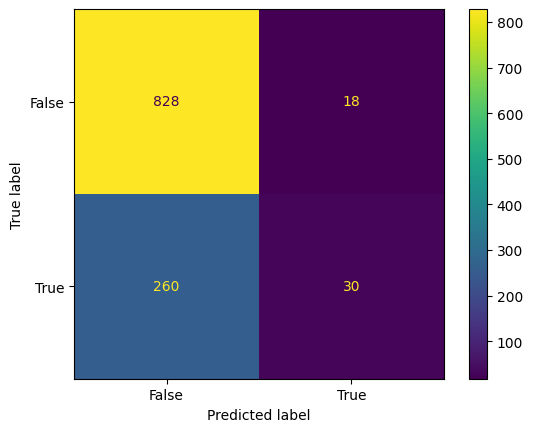

In [23]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()

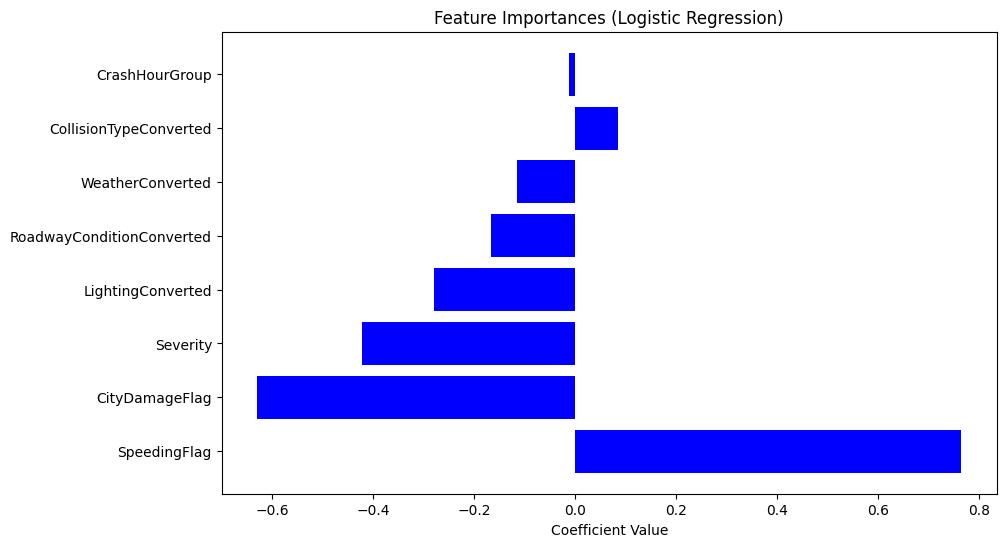

In [24]:
importances = lr.coef_[0]
feature_names = X_train.columns

indices = np.argsort(np.abs(importances))[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Logistic Regression)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.show()

In [ ]:
df['HitAndRunFlag'].value_counts()

,count
HitAndRunFlag,
False,3476
True,1067
